In [2]:
import pandas as pd

df = pd.read_csv("Heart_Disease_Selected_Features.csv")

In [3]:
df.head()

,Unnamed: 0,ca_0.0,thalach,thal_3.0,oldpeak,age,cp_4,thal_7.0,trestbps,target
0,0,1.0,0.017494,0.0,1.068965,0.936181,0.0,0.0,0.750380,0
1,1,0.0,-1.816334,1.0,0.381773,1.378929,1.0,0.0,1.596266,1
2,2,0.0,-0.899420,0.0,1.326662,1.378929,1.0,1.0,-0.659431,1
3,3,1.0,1.633010,1.0,2.099753,-1.941680,0.0,0.0,-0.095506,0
4,4,1.0,0.978071,1.0,0.295874,-1.498933,0.0,0.0,-0.095506,0


In [4]:
df = df.drop("Unnamed: 0",axis=1)
df.head()

,ca_0.0,thalach,thal_3.0,oldpeak,age,cp_4,thal_7.0,trestbps,target
0,1.0,0.017494,0.0,1.068965,0.936181,0.0,0.0,0.750380,0
1,0.0,-1.816334,1.0,0.381773,1.378929,1.0,0.0,1.596266,1
2,0.0,-0.899420,0.0,1.326662,1.378929,1.0,1.0,-0.659431,1
3,1.0,1.633010,1.0,2.099753,-1.941680,0.0,0.0,-0.095506,0
4,1.0,0.978071,1.0,0.295874,-1.498933,0.0,0.0,-0.095506,0


In [6]:
from sklearn.model_selection import train_test_split
X=df.drop("target",axis=1)
y=df["target"]
X_train ,X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

In [7]:
print(X_train.shape,X_test.shape)

(237, 8) (60, 8)


In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)

In [13]:
from sklearn import tree
dtc=tree.DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred=dtc.predict(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()
lrc.fit(X_train,y_train)
lrc_pred=lrc.predict(X_test)

In [15]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def train_model(classifier):
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    y_proba = classifier.predict_proba(X_test)[:, 1]
    # 1. Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # 2. Precision
    prec = precision_score(y_test, y_pred)
    
    # 3. Recall
    rec = recall_score(y_test, y_pred)
    
    # 4. F1-score
    f1 = f1_score(y_test, y_pred)
    print(str(classifier))
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    
    # 5. ROC Curve & AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0,1], [0,1], 'k--')  # random baseline
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


RandomForestClassifier()
Accuracy: 0.75
Precision: 0.7916666666666666
Recall: 0.6551724137931034
F1-score: 0.7169811320754716


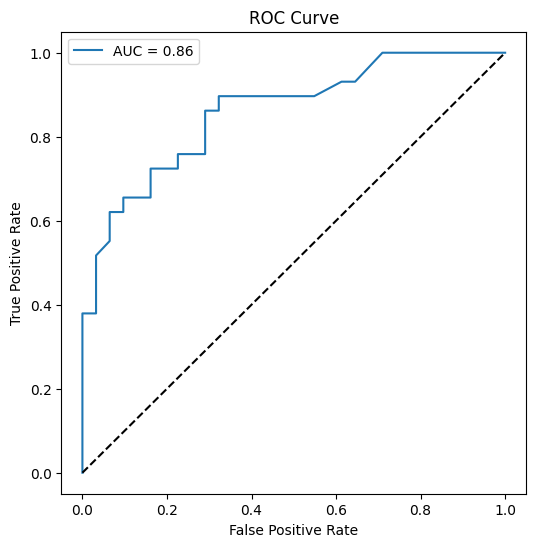

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression

rfc = RandomForestClassifier()
train_model(rfc)

DecisionTreeClassifier()
Accuracy: 0.6833333333333333
Precision: 0.6785714285714286
Recall: 0.6551724137931034
F1-score: 0.6666666666666666


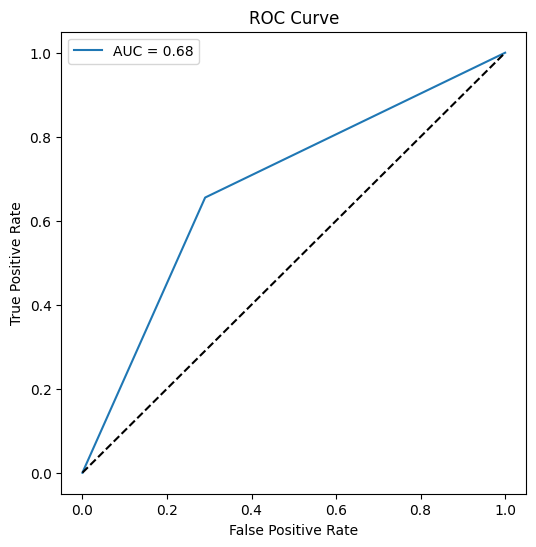

In [26]:
dtc=tree.DecisionTreeClassifier()
train_model(dtc)

LogisticRegression()
Accuracy: 0.85
Precision: 0.8846153846153846
Recall: 0.7931034482758621
F1-score: 0.8363636363636363


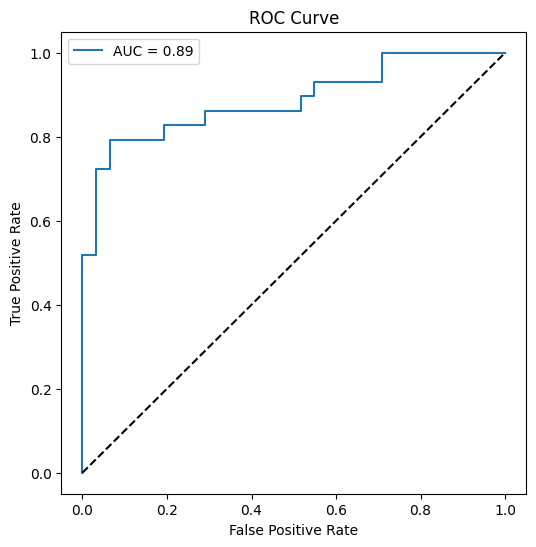

In [27]:
lrc=LogisticRegression()
train_model(lrc)

SVC(probability=True)
Accuracy: 0.8166666666666667
Precision: 0.8461538461538461
Recall: 0.7586206896551724
F1-score: 0.8


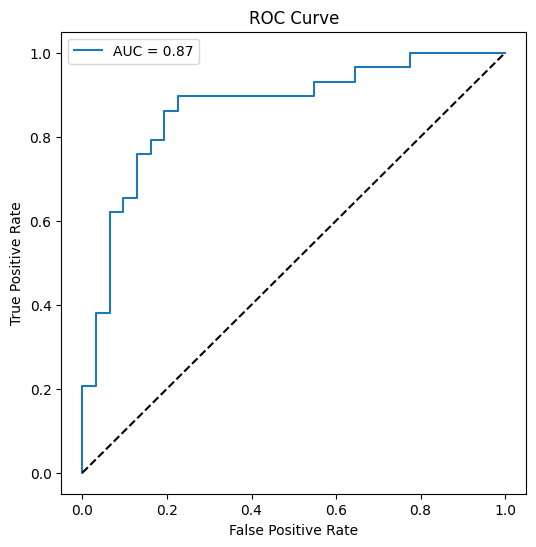

In [28]:
clf = svm.SVC(probability=True)
train_model(clf)